In [25]:
import numpy as np
np.set_printoptions(suppress=True)
from scipy import misc
from scipy.ndimage import convolve
from scipy import fftpack
import cv2
from collections import Counter
from skimage.exposure import match_histograms
import matplotlib.pyplot as plt
from skimage import io
import warnings
warnings.filterwarnings("ignore")
from scipy.ndimage import gaussian_filter
import math
from scipy.signal import convolve2d, gaussian, fftconvolve

In [15]:
def twodConvolve(f,w):
    rotw=np.rot90(w)
    rotw=w
    M,N=np.shape(f)
    m,n=np.shape(rotw)
    a=math.floor((m-1)/2)
    b=math.floor((n-1)/2)
    g=np.zeros((M,N),dtype=float)
    for i in range(0,M):
        for k in range(0,N):
            for A in range(-a,a):
                for B in range(-b,b):
                    if i==0 or i>=M-m or k==0 or k>=N-n:
                        g[i,k]=f[i,k]
                    else:
                        g[i,k]+=rotw[A,B]*f[i-A,k-B]
    return g

In [8]:
def CreateGaussFilter(size, sigma):
    filter=np.zeros((size,size), dtype=float)
    for i in range(0,size):
        for k in range(0,size):
            filter[i][k]=(1/2*math.pi*sigma**2)*math.e**(-((i**2+k**2)/2*sigma**2))
            # print(filter)
    return filter

In [11]:
def LowPassFilter(im,filter):
    M,N=np.shape(im)
    g=np.zeros((M,N),dtype=float)
    m,n=np.shape(filter)
    a=math.floor((m-1)/2)
    b=math.floor((n-1)/2)
    for i in range(0,M):
        for k in range(0,N):
            for A in range(-a,a):
                for B in range(-b,b):
                    if i==0 or i>=M-m or k==0 or k>=N-n:
                        g[i,k]=im[i,k]
                    else:
                        g[i,k]+=filter[A+a,B+b]*im[i+A,k+B]
    return g    

[[0.52729242 0.60653066 0.67032005 0.71177032 0.72614904 0.71177032
  0.67032005 0.60653066 0.52729242]
 [0.60653066 0.69767633 0.77105159 0.81873075 0.83527021 0.81873075
  0.77105159 0.69767633 0.60653066]
 [0.67032005 0.77105159 0.85214379 0.90483742 0.92311635 0.90483742
  0.85214379 0.77105159 0.67032005]
 [0.71177032 0.81873075 0.90483742 0.96078944 0.98019867 0.96078944
  0.90483742 0.81873075 0.71177032]
 [0.72614904 0.83527021 0.92311635 0.98019867 1.         0.98019867
  0.92311635 0.83527021 0.72614904]
 [0.71177032 0.81873075 0.90483742 0.96078944 0.98019867 0.96078944
  0.90483742 0.81873075 0.71177032]
 [0.67032005 0.77105159 0.85214379 0.90483742 0.92311635 0.90483742
  0.85214379 0.77105159 0.67032005]
 [0.60653066 0.69767633 0.77105159 0.81873075 0.83527021 0.81873075
  0.77105159 0.69767633 0.60653066]
 [0.52729242 0.60653066 0.67032005 0.71177032 0.72614904 0.71177032
  0.67032005 0.60653066 0.52729242]]


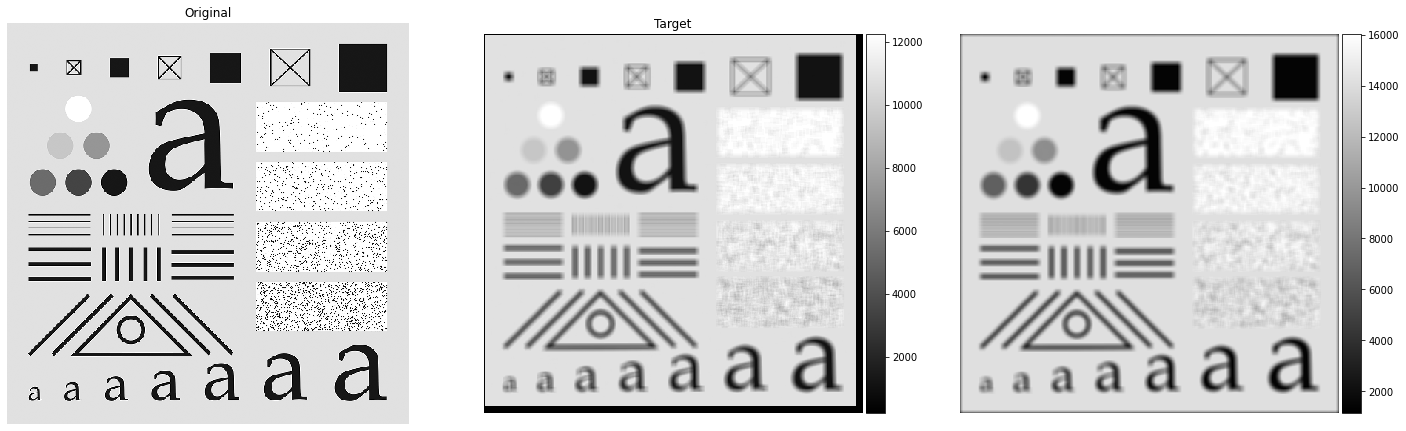

In [26]:
test=cv2.imread("testpattern512.tif",0)
filter=np.outer(gaussian(9,5), gaussian(9,5))
print(filter)
output=twodConvolve(test,filter)
builtin=fftconvolve(test,filter,mode='same')

fig,ax = plt.subplots(nrows = 1,ncols=3,figsize = (20,20))
plt.subplot(1,3,1),io.imshow(test),ax[0].set_title("Original")
plt.subplot(1,3,2),io.imshow(output, cmap='gray'),ax[1].set_title("Target")
plt.subplot(1,3,3),io.imshow(builtin, cmap='gray'),ax[1].set_title("Target")
for a in ax:
    a.axis('off')